<a href="https://colab.research.google.com/github/maleal2/AAI-510.-Machine-Learning-_Group_5/blob/main/Final_Project_Section7_Team_5_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Number**: 5

**Team Leader/Representative**: Maria Leal Cardenas

**Full Names of Team Members**:
1. Maria Leal Cardenas
2. Mayank Bhatt
3. Vanessa Dyan Laxamana

**Title of Your Project**:  Developing a Machine Learning Model to Assist Home Credit Services in Loan Decisions for Unbanked Populations


**Description and Objects**

Home Credit is a loan service company that provides credit to unbanked populations. Our aim is to assist them by developing a machine learning model to predict whether a client will repay a loan, addressing the primary objective of the business. The dataset used in this project is from a 2018 Kaggle competition and can be found at the following URL: Home Credit Default Risk.
Name of Your Selected Dataset: train_data.csv, and bureau_data.csv


**Descrition of selected dataset**:

•	Source of the datasets: https://www.kaggle.com/competitions/home-credit-default-risk

•	Dataset: train_data.csv

•	Number of datapoints: 153,755

•	Number of variables: 122

•	Dataset: bureau_data.csv

•	Number of datapoints: 733,097

•	Number of variables: 17



**Abstract**:

This code presents the design and implementation of a machine learning model aimed at assisting Home Credit Services in making loan decisions for unbanked populations. The data includes current loan applications and previous bureau records provided by Home Credit. The current loan application data contains valuable information such as annual income, total loan amount, date of birth, type of work, type of education, living and working locations, and more. The bureau data represents external financial information where the same applicants have also applied for loans.

First, we start with data importation and inspection of both datasets, confirming the highly uneven distribution of the target variable (0 and 1). There are more data points for 0 (repayable loans) than for 1 (non-repayable loans).

Next, we proceed to calculate new features derived from the bureau dataset. These new features include the mean, median, maximum, and minimum values for data such as credit amount, annual income, type of credit, credit account status, and others. This step ensures we do not discard potentially meaningful data that could improve the model's predictions.

After generating new features, we calculate the correlation of these new variables with the "TARGET" variable. The results are saved in a dataset called train_data_agg_new. We then identify and remove highly correlated variables to prevent overfitting, saving the results in a variable called cols_to_remove. This step is crucial as using highly correlated variables can lead to biased predictions.

Finally, we integrate the original train_data dataset with train_data_agg_new, obtained from the aggregated statistics of the bureau data. We apply the Light Gradient Boosting Machine (LightGBM) as Model 1, utilizing One-Hot Encoding and cubic interpolation for data processing, and employ cross-validation to handle the high-dimensional scenario. We present the results and conclusions from this model. For comparison, we also train Model 2 using the dataset with all highly correlated features to evaluate its performance.



# Importing dataset to Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Basic Libraries

In [211]:
# Importing Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing Additional Libraries

# Data Preparation
from sklearn.preprocessing import LabelEncoder  # Converting categorical variables into numerical data
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Scaling the data for Principal Component Analysis
from sklearn.impute import SimpleImputer  # Handling missing values

# Data Splitting and Cross-Validation
from sklearn.model_selection import train_test_split  # Splitting the data into training and testing sets
from sklearn.model_selection import KFold  # Cross-validation during model training

# Machine Learning Model
import lightgbm as lgb  # LightGBM model

# Evaluation Metrics
from sklearn.metrics import roc_auc_score  # Computing the ROC AUC score

# Memory Management
import gc  # Garbage collection for memory management

# Importing Data

## Checking train_data distribution

In [150]:
train_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAI-510-Machine Learning/Group 5/Home Credit Default Risk Data/assignment/train_data.csv')
print(train_data.shape)
train_data.head()

(153755, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,410704,0,Cash loans,F,N,Y,1,157500.0,900000.0,26446.5,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-16180,-2037,-3722.0,-3495,NaN,1,1,1,1,1,0,NaN,3.0,2,2,WEDNESDAY,8,0,0,0,0,0,0,Business Entity Type 3,NaN,0.397762,0.177704,0.0619,0.0611,0.9856,0.8028,0.0086,0.0,0.1379,0.1667,0.2083,0.0299,0.0504,0.0519,0.0,0.000,0.0630,0.0634,0.9856,0.8105,0.0086,0.0,0.1379,0.1667,0.2083,0.0306,0.0551,0.0541,0.0,0.0000,0.0625,0.0611,0.9856,0.8054,0.0086,0.0,0.1379,0.1667,0.2083,0.0305,0.0513,0.0528,0.0,0.000,reg oper account,block of flats,0.0408,Panel,No,0.0,0.0,0.0,0.0,-1755.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,381230,0,Cash loans,F,N,Y,1,90000.0,733176.0,21438.0,612000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.031329,-14969,-162,-5502.0,-4442,NaN,1,1,1,1,1,1,Accountants,2.0,2,2,FRIDAY,11,0,0,0,0,1,1,Bank,0.697782,0.696312,0.538863,0.0330,NaN,0.9781,0.7008,NaN,0.0,0.0345,0.0833,NaN,0.0251,NaN,0.0166,NaN,0.000,0.0336,NaN,0.9782,0.7125,NaN,0.0,0.0345,0.0833,NaN,0.0257,NaN,0.0173,NaN,0.0000,0.0333,NaN,0.9781,0.7048,NaN,0.0,0.0345,0.0833,NaN,0.0256,NaN,0.0169,NaN,0.000,reg oper account,block of flats,0.0131,Wooden,No,7.0,0.0,7.0,0.0,-3268.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
2,450177,0,Cash loans,F,Y,Y,0,189000.0,1795500.0,62541.0,1795500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-22213,365243,-12395.0,-4674,7.0,1,0,0,1,0,0,NaN,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,XNA,NaN,0.716972,0.355639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,9.0,0.0,0.0,0

In [151]:
train_data2= train_data.copy()
train_data3= train_data.copy()

In [152]:
# Checking the total number of entries and features available.
train_data['TARGET'].value_counts()

TARGET
0    141343
1     12412
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

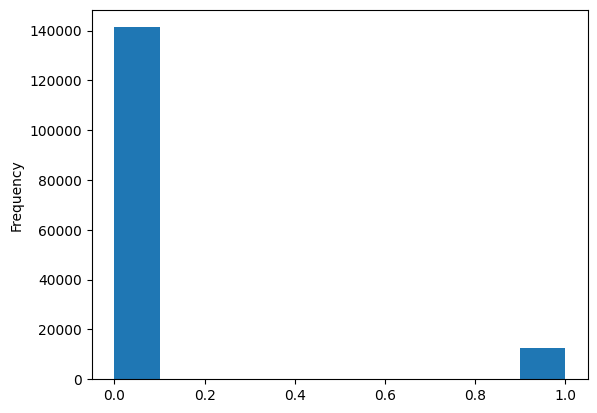

In [153]:
# Plotting a histogram of the total counts for "0" and "1" in the "TARGET" column.
train_data['TARGET'].astype(int).plot.hist()

In [154]:
# Calculating the number of missing values and their percentage
nann_values= train_data.isnull().sum()
nann_values_percent= 100*train_data.isnull().sum()/len(train_data)

# Combining the two series into a DataFrame
nann_values_table= pd.concat([nann_values,nann_values_percent],axis=1)

# Renaming the columns
nann_values_table_ren_colum= nann_values_table.rename(columns={0:'Missing Values' , 1:'% of Total Values'})

# Filtering out columns with 0% missing values and sort by percentage of missing values.
nann_values_table_ren_colum=nann_values_table_ren_colum[nann_values_table_ren_colum.iloc[:,1]!=0].sort_values('% of Total Values',ascending =False).round(1)

# Adjusting Pandas to display settings
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-detect the width of the display
pd.set_option('display.max_colwidth', None)  # Show full column content

# Displaying  the table
print(nann_values_table_ren_colum)

                              Missing Values  % of Total Values
COMMONAREA_MEDI                       107523               69.9
COMMONAREA_AVG                        107523               69.9
COMMONAREA_MODE                       107523               69.9
NONLIVINGAPARTMENTS_MEDI              106918               69.5
NONLIVINGAPARTMENTS_MODE              106918               69.5
NONLIVINGAPARTMENTS_AVG               106918               69.5
LIVINGAPARTMENTS_MODE                 105193               68.4
LIVINGAPARTMENTS_MEDI                 105193               68.4
LIVINGAPARTMENTS_AVG                  105193               68.4
FONDKAPREMONT_MODE                    105177               68.4
FLOORSMIN_MODE                        104424               67.9
FLOORSMIN_MEDI                        104424               67.9
FLOORSMIN_AVG                         104424               67.9
YEARS_BUILD_MODE                      102283               66.5
YEARS_BUILD_MEDI                      10

In [155]:
# Verifying the number of counts values per type.
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

Among the provided variables or features in the training data. There are a total of 65 decimals, 41 integers, and 16 categorical.

In [156]:
train_data.select_dtypes('object').nunique() # Checking the number of unique values for categorical variables.

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Except for ORGANIZATION_TYPE AND OCCUPATION_TYPE, the rest of the categorical variables has fewer unique values.

## Checking bureau_data

In [157]:
bureau_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAI-510-Machine Learning/Group 5/Home Credit Default Risk Data/assignment/bureau_data.csv')
print(bureau_data.shape)
bureau_data.head()

(733097, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,410704,5636127,Closed,currency 1,-2686,0,-1592.0,-1595.0,NaN,0,720000.0,0.0,NaN,0.0,Consumer credit,-1592,NaN
1,410704,5636128,Closed,currency 1,-1280,0,545.0,-959.0,NaN,0,1215000.0,0.0,NaN,0.0,Consumer credit,-955,NaN
2,410704,5636129,Closed,currency 1,-1167,0,-954.0,-954.0,NaN,0,78619.5,0.0,NaN,0.0,Consumer credit,-952,NaN
3,410704,5636130,Closed,currency 1,-671,0,-306.0,-303.0,NaN,0,254700.0,0.0,NaN,0.0,Consumer credit,-303,NaN
4,410704,5636131,Active,currency 1,-560,0,NaN,NaN,NaN,0,0.0,0.0,NaN,0.0,Credit card,-226,NaN


In [158]:
# Calculating the number of missing values and their percentage
nann_values= bureau_data.isnull().sum()
nann_values_percent= 100*bureau_data.isnull().sum()/len(bureau_data)

# Combining the two series into a DataFrame
nann_values_table= pd.concat([nann_values,nann_values_percent],axis=1)

# Renaming the columns
nann_values_table_ren_colum= nann_values_table.rename(columns={0:'Missing Values' , 1:'% of Total Values'})

# Filtering out columns with 0% missing values and sort by percentage of missing values.
nann_values_table_ren_colum=nann_values_table_ren_colum[nann_values_table_ren_colum.iloc[:,1]!=0].sort_values('% of Total Values',ascending =False).round(1)

# Adjusting Pandas to display settings
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-detect the width of the display
pd.set_option('display.max_colwidth', None)  # Show full column content

# Displaying  the table
print(nann_values_table_ren_colum)

                        Missing Values  % of Total Values
AMT_ANNUITY                     566245               77.2
AMT_CREDIT_MAX_OVERDUE          475076               64.8
DAYS_ENDDATE_FACT               272089               37.1
AMT_CREDIT_SUM_LIMIT            245511               33.5
AMT_CREDIT_SUM_DEBT             111959               15.3
DAYS_CREDIT_ENDDATE              44884                6.1
AMT_CREDIT_SUM                       1                0.0


In [159]:
# Verifying the number of counts values per type.
bureau_data.dtypes.value_counts()

float64    8
int64      6
object     3
Name: count, dtype: int64

Among the provided variables or features in the bureau_dataa. There are a total of 8 decimals, 6 integers, and 3 categorical.

# Train_Data + Bureau_Data

### **Function to Aggregate Numeric Data**

In [160]:
def agg_numeric(df, parent_var, df_name):

    # It removes the id variables other than grouping variable
    for col in df:
        if col != parent_var and 'SK_ID' in col:
            df = df.drop(columns = col)

    # Collecting only the numeric variables
    parent_ids = df[parent_var].copy()
    numeric_df = df.select_dtypes('number').copy()
    numeric_df[parent_var] = parent_ids

    # Grouping by the specified variable and calculating the statistics
    agg = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])


    columns = []

    # Iterating through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterating through the stat names
            for stat in agg.columns.levels[1]:
                # Making a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns

    # Removing the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]

    return agg

### **Function to Calculate Categorical Counts**


In [161]:
def count_categorical(df, group_var, df_name):

    # Selecting  the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Making  sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Grouping by  the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])

    column_names = []

    # Iterating through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterating  through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Making a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))

    categorical.columns = column_names

    return categorical

In [162]:
bureau_data_agg_new = agg_numeric(bureau_data.drop(columns = ['SK_ID_BUREAU']),'SK_ID_CURR', df_name = 'bureau') # Aggregating new statistical numerical data.
bureau_data_agg_new.head()

,bureau_DAYS_CREDIT_sum,bureau_DAYS_CREDIT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_DAYS_CREDIT_UPDATE_sum,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_CREDIT_mean,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_ENDDATE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_CNT_CREDIT_PROLONG_min,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_sum,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_DAYS_ENDDATE_FACT_count,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_DAYS_CREDIT_ENDDATE_count,bureau_AMT_CREDIT_SUM_count,bureau_DAYS_CREDIT_count,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100004,-1734,-1326,-1065.0,-1064,-977.0,-867.000000,-683.0,-682,-595.0,-532.50,-532.00,-488.500000,-408,-382.0,-382,-382.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,0.000,0.00,0.00,0.0,0.0,1,2,2,2,2,2,2,94500.0,94518.900,94537.8,189037.8,NaN,NaN,NaN
100007,-1149,-1149,-783.0,-783,-783.0,-1149.000000,-783.0,-783,-783.0,-783.00,-783.00,-783.000000,-1149,-783.0,-783,-783.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,0.000,0.00,0.00,0.0,0.0,1,1,1,1,1,1,1,146250.0,146250.000,146250.0,146250.0,NaN,NaN,NaN
100008,-2272,-1097,-1818.0,-1833,-1174.0,-757.333333,-1028.0,-1027,-853.0,-909.00,-611.00,-391.333333,-78,-790.0,-16,471.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0,0.000,0.00,80019.00,240057.0,240057.0,1,2,3,3,3,3,3,95134.5,156148.500,267606.0,468445.5,NaN,NaN,NaN
100010,-3879,-2741,-1138.0,-1156,-239.0,-1939.500000,-1138.0,-1138,-928.0,-1138.00,-578.00,-119.500000,-1138,-1138.0,-18,689.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,NaN,NaN,NaN,174003.75,348007.5,348007.5,0,1,1,2,2,2,2,315000.0,495000.000,675000.0,990000.0,NaN,NaN,NaN
100011,-7092,-2508,-5853.0,-5819,-5173.0,-1773.000000,-2197.0,-2172,-2173.0,-1463.25,-1454.75,-1293.250000,-1309,-968.0,-965,-860.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,10147.23,0.0,5073.615,10147.23,0.00,0.0,0.0,2,4,3,3,4,4,4,54000.0,108807.075,145242.0,435228.3,NaN,NaN,NaN


In [168]:
bureau_data_agg_new.shape

(131670, 56)

In [169]:
bureau_data_counts = count_categorical(bureau_data, group_var = 'SK_ID_CURR', df_name = 'bureau') # Aggregating new statistic categorical data.
bureau_data_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,bureau_CREDIT_CURRENCY_currency 2_count,bureau_CREDIT_CURRENCY_currency 2_count_norm,bureau_CREDIT_CURRENCY_currency 3_count,bureau_CREDIT_CURRENCY_currency 3_count_norm,bureau_CREDIT_CURRENCY_currency 4_count,bureau_CREDIT_CURRENCY_currency 4_count_norm,bureau_CREDIT_TYPE_Another type of loan_count,bureau_CREDIT_TYPE_Another type of loan_count_norm,bureau_CREDIT_TYPE_Car loan_count,bureau_CREDIT_TYPE_Car loan_count_norm,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count_norm,bureau_CREDIT_TYPE_Consumer credit_count,bureau_CREDIT_TYPE_Consumer credit_count_norm,bureau_CREDIT_TYPE_Credit card_count,bureau_CREDIT_TYPE_Credit card_count_norm,bureau_CREDIT_TYPE_Interbank credit_count,bureau_CREDIT_TYPE_Interbank credit_count_norm,bureau_CREDIT_TYPE_Loan for business development_count,bureau_CREDIT_TYPE_Loan for business development_count_norm,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count_norm,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,1.00,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100007,0,0.000000,0,0.0,1,1.000000,0,0.0,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1.00,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100008,1,0.333333,0,0.0,2,0.666667,0,0.0,3,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,3,1.00,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100010,1,0.500000,0,0.0,1,0.500000,0,0.0,2,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.50,0,0.00,0,0.0,1,0.5,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100011,0,0.000000,0,0.0,4,1.000000,0,0.0,4,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,3,0.75,1,0.25,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [170]:
bureau_data_counts.shape

(131670, 46)

In [171]:
original_features = list(train_data.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  122


In [172]:
# Calculating the aggregated and count data
train_data_agg_new = agg_numeric(train_data3.drop(columns=['TARGET']), 'SK_ID_CURR', 'train')
train_data_counts = count_categorical(train_data3.drop(columns=['TARGET']), group_var='SK_ID_CURR', df_name='train')

# Retaining the TARGET column and set 'SK_ID_CURR' as the index
target_data3 = train_data3[['SK_ID_CURR', 'TARGET']].set_index('SK_ID_CURR')

# Merging the aggregated and count data with the TARGET column
train_data_agg_new = train_data_agg_new.merge(target_data3, on='SK_ID_CURR', how='left')
train_data_agg_new = train_data_agg_new.merge(train_data_counts, on='SK_ID_CURR', how='left')

# Merging the bureau_data_agg_new and bureau_data_counts into the aggregated data
train_data_agg_new = train_data_agg_new.merge(bureau_data_agg_new, on='SK_ID_CURR', how='left')
train_data_agg_new = train_data_agg_new.merge(bureau_data_counts, on='SK_ID_CURR', how='left')


<ipython-input-172-4820c01aafb4>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data_agg_new = train_data_agg_new.merge(target_data3, on='SK_ID_CURR', how='left')
<ipython-input-172-4820c01aafb4>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data_agg_new = train_data_agg_new.merge(train_data_counts, on='SK_ID_CURR', how='left')
<ipython-input-172-4820c01aafb4>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co

### Missing Values
An important consideration is the missing values in the dataframe. Columns with too many missing values might have to be dropped.

In [173]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [174]:
missing_train_data = missing_values_table(train_data_agg_new)
missing_train_data.head(10)

Your selected dataframe has 689 columns.
There are 282 columns that have missing values.


,Missing Values,% of Total Values
bureau_AMT_ANNUITY_min,114048,74.2
bureau_AMT_ANNUITY_mean,114048,74.2
bureau_AMT_ANNUITY_max,114048,74.2
train_COMMONAREA_MODE_mean,107523,69.9
train_COMMONAREA_AVG_mean,107523,69.9
train_COMMONAREA_AVG_min,107523,69.9
train_COMMONAREA_MODE_min,107523,69.9
train_COMMONAREA_MODE_max,107523,69.9
train_COMMONAREA_MEDI_min,107523,69.9
train_COMMONAREA_MEDI_max,107523,69.9


In [175]:
missing_train_data_vars = list(missing_train_data.index[missing_train_data['% of Total Values'] > 90]) # Removing columns that have more than 90% of missing values.
len(missing_train_data_vars)

0

In [176]:
train_data_agg_new = train_data_agg_new.drop(columns = missing_train_data_vars)

In [177]:
train_data_agg_new.to_csv('/content/drive/MyDrive/Colab Notebooks/AAI-510-Machine Learning/Group 5/Home Credit Default Risk Data/assignment/train_bureau_raw.csv', index = False)

In [178]:
train_data_agg_new.head()

,train_DAYS_BIRTH_mean,train_DAYS_REGISTRATION_mean,train_DAYS_ID_PUBLISH_mean,train_DAYS_LAST_PHONE_CHANGE_mean,train_DAYS_EMPLOYED_mean,train_FLAG_DOCUMENT_12_mean,train_FLAG_DOCUMENT_2_mean,train_FLAG_DOCUMENT_10_mean,train_FLAG_DOCUMENT_4_mean,train_FLAG_DOCUMENT_7_mean,train_FLAG_DOCUMENT_17_mean,train_FLAG_DOCUMENT_19_mean,train_FLAG_DOCUMENT_20_mean,train_FLAG_DOCUMENT_14_mean,train_FLAG_DOCUMENT_21_mean,train_FLAG_DOCUMENT_9_mean,train_FLAG_DOCUMENT_15_mean,train_FLAG_DOCUMENT_11_mean,train_FLAG_DOCUMENT_5_mean,train_FLAG_DOCUMENT_18_mean,train_AMT_REQ_CREDIT_BUREAU_DAY_sum,train_FLAG_DOCUMENT_13_mean,train_AMT_REQ_CREDIT_BUREAU_HOUR_sum,train_FLAG_DOCUMENT_16_mean,train_REG_REGION_NOT_LIVE_REGION_mean,train_AMT_REQ_CREDIT_BUREAU_WEEK_sum,train_DEF_60_CNT_SOCIAL_CIRCLE_sum,train_DEF_60_CNT_SOCIAL_CIRCLE_mean,train_DEF_60_CNT_SOCIAL_CIRCLE_max,train_DEF_60_CNT_SOCIAL_CIRCLE_min,train_LIVE_REGION_NOT_WORK_REGION_mean,train_REG_REGION_NOT_WORK_REGION_mean,train_FLAG_EMAIL_mean,train_DEF_30_CNT_SOCIAL_CIRCLE_sum,train_DEF_30_CNT_SOCIAL_CIRCLE_mean,train_DEF_30_CNT_SOCIAL_CIRCLE_max,train_DEF_30_CNT_SOCIAL_CIRCLE_min,train_CNT_CHILDREN_mean,train_REG_CITY_NOT_LIVE_CITY_mean,train_NONLIVINGAPARTMENTS_AVG_sum,train_NONLIVINGAPARTMENTS_MEDI_sum,train_NONLIVINGAPARTMENTS_MODE_sum,train_NONLIVINGAREA_AVG_sum,train_NONLIVINGAREA_MEDI_sum,train_NONLIVINGAREA_MODE_sum,train_COMMONAREA_AVG_sum,train_COMMONAREA_MEDI_sum,train_COMMONAREA_MODE_sum,train_BASEMENTAREA_MEDI_sum,train_BASEMENTAREA_AVG_sum,train_BASEMENTAREA_MODE_sum,train_LIVINGAPARTMENTS_AVG_sum,train_LIVINGAPARTMENTS_MEDI_sum,train_LIVINGAPARTMENTS_MODE_sum,train_ELEVATORS_MEDI_sum,train_ELEVATORS_AVG_sum,train_ELEVATORS_MODE_sum,train_FLOORSMIN_MODE_sum,train_FLOORSMIN_MEDI_sum,train_FLOORSMIN_AVG_sum,train_YEARS_BUILD_AVG_sum,train_YEARS_BUILD_MEDI_sum,train_YEARS_BUILD_MODE_sum,train_COMMONAREA_AVG_count,train_NONLIVINGAPARTMENTS_AVG_count,train_LIVINGAPARTMENTS_AVG_count,train_FLOORSMIN_AVG_count,train_YEARS_BUILD_AVG_count,train_BASEMENTAREA_AVG_count,train_AMT_REQ_CREDIT_BUREAU_DAY_mean,train_AMT_REQ_CREDIT_BUREAU_DAY_max,train_AMT_REQ_CREDIT_BUREAU_DAY_min,train_AMT_REQ_CREDIT_BUREAU_HOUR_mean,train_AMT_REQ_CREDIT_BUREAU_HOUR_max,train_AMT_REQ_CREDIT_BUREAU_HOUR_min,train_AMT_REQ_CREDIT_BUREAU_WEEK_mean,train_AMT_REQ_CREDIT_BUREAU_WEEK_max,train_AMT_REQ_CREDIT_BUREAU_WEEK_min,train_LANDAREA_AVG_sum,train_LANDAREA_MEDI_sum,train_LANDAREA_MODE_sum,train_TOTALAREA_MODE_sum,train_LIVINGAREA_AVG_sum,train_LIVINGAREA_MEDI_sum,train_LIVINGAREA_MODE_sum,train_APARTMENTS_AVG_sum,train_APARTMENTS_MEDI_sum,train_APARTMENTS_MODE_sum,train_FLOORSMAX_MODE_sum,train_FLOORSMAX_MEDI_sum,train_FLOORSMAX_AVG_sum,train_ENTRANCES_MODE_sum,train_ENTRANCES_MEDI_sum,train_ENTRANCES_AVG_sum,train_YEARS_BEGINEXPLUATATION_MEDI_sum,train_YEARS_BEGINEXPLUATATION_MODE_sum,train_YEARS_BEGINEXPLUATATION_AVG_sum,train_AMT_REQ_CREDIT_BUREAU_MON_sum,train_LANDAREA_AVG_count,train_ELEVATORS_AVG_count,train_NONLIVINGAREA_AVG_count,train_LIVINGAREA_AVG_count,train_ENTRANCES_AVG_count,train_YEARS_BEGINEXPLUATATION_AVG_count,train_APARTMENTS_AVG_count,train_FLOORSMAX_AVG_count,train_TOTALAREA_MODE_count,train_AMT_REQ_CREDIT_BUREAU_MON_mean,train_AMT_REQ_CREDIT_BUREAU_MON_max,train_AMT_REQ_CREDIT_BUREAU_MON_min,train_FLAG_DOCUMENT_6_mean,train_EXT_SOURCE_1_sum,train_EXT_SOURCE_1_count,train_OBS_60_CNT_SOCIAL_CIRCLE_sum,train_OBS_60_CNT_SOCIAL_CIRCLE_mean,train_OBS_60_CNT_SOCIAL_CIRCLE_max,train_OBS_60_CNT_SOCIAL_CIRCLE_min,train_OBS_30_CNT_SOCIAL_CIRCLE_sum,train_OBS_30_CNT_SOCIAL_CIRCLE_mean,train_OBS_30_CNT_SOCIAL_CIRCLE_max,train_OBS_30_CNT_SOCIAL_CIRCLE_min,train_AMT_REQ_CREDIT_BUREAU_QRT_sum,train_AMT_REQ_CREDIT_BUREAU_QRT_mean,train_AMT_REQ_CREDIT_BUREAU_QRT_max,train_AMT_REQ_CREDIT_BUREAU_QRT_min,train_AMT_REQ_CREDIT_BUREAU_YEAR_sum,train_AMT_REQ_CREDIT_BUREAU_YEAR_mean,train_AMT_REQ_CREDIT_BUREAU_YEAR_max,train_AMT_REQ_CREDIT_BUREAU_YEAR_min,train_FLAG_DOCUMENT_3_mean,train_FLAG_DOCUMENT_8_mean,t

In [179]:
train_data_agg_new.shape

(153755, 689)

In [180]:
# Calculating  all correlations in dataframe
corrs = train_data_agg_new.corr()

In [181]:
corrs = corrs.sort_values('TARGET', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs['TARGET'].head(10))

,TARGET
TARGET,1.000000
bureau_DAYS_CREDIT_mean,0.089695
train_DAYS_BIRTH_mean,0.077244
bureau_CREDIT_ACTIVE_Active_count_norm,0.076858
bureau_DAYS_CREDIT_min,0.076247
bureau_DAYS_CREDIT_UPDATE_mean,0.068118
bureau_CREDIT_ACTIVE_Active_count,0.066243
train_REGION_RATING_CLIENT_W_CITY_mean,0.059529
train_NAME_INCOME_TYPE_Working_count_norm,0.058475
train_NAME_INCOME_TYPE_Working_count,0.058475


In [182]:
# Ten most negative correlations
pd.DataFrame(corrs['TARGET'].dropna().tail(10))

,TARGET
train_EXT_SOURCE_2_sum,-0.157598
train_EXT_SOURCE_1_min,-0.157721
train_EXT_SOURCE_1_mean,-0.157721
train_EXT_SOURCE_1_max,-0.157721
train_EXT_SOURCE_2_min,-0.159253
train_EXT_SOURCE_2_mean,-0.159253
train_EXT_SOURCE_2_max,-0.159253
train_EXT_SOURCE_3_max,-0.179497
train_EXT_SOURCE_3_mean,-0.179497
train_EXT_SOURCE_3_min,-0.179497


## KDE Density Estimate Plots Function

In [183]:
# Plotting the disribution of a variable colored by value of the target
def kde_target(var_name, df):

    # Calculating  the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])

    # Calculating medians for repaid vs not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()

    plt.figure(figsize = (12, 6))

    # Plotting the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')

    # labeling  the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();

    # printing out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Printing  out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)


The correlation between bureau_CREDIT_ACTIVE_Active_count_norm and the TARGET is 0.0769
Median value for loan that was not repaid = 0.5000
Median value for loan that was repaid =     0.3636


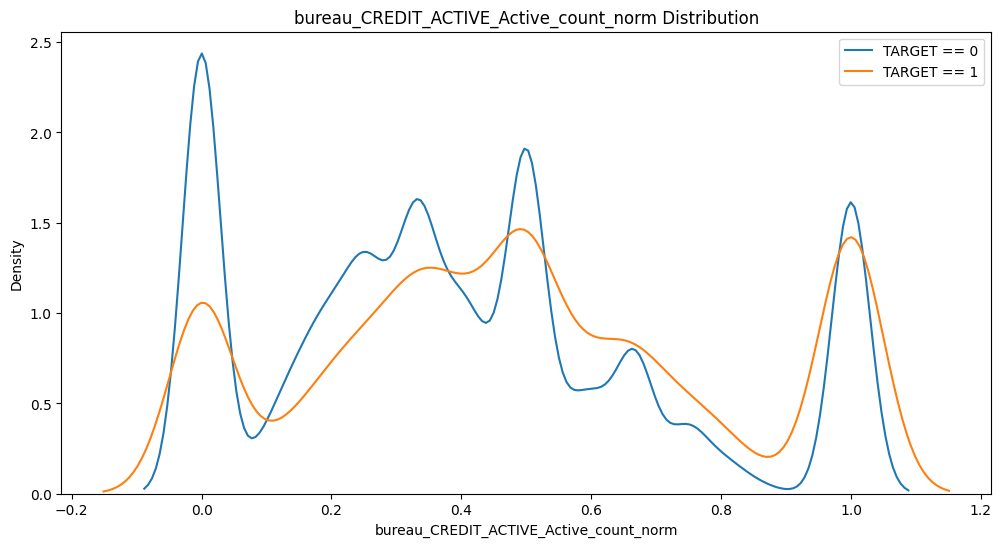

In [121]:
kde_target(var_name='bureau_CREDIT_ACTIVE_Active_count_norm', df=train_data_agg_new)

This distribution is highly irregular. This variable represents the number of previous loans with a CREDIT_ACTIVE value of 'Active' divided by the total number of previous loans for a client. The correlation here is so weak that I do not think we should draw any conclusions from it.

**Collinear Variables**

Next, we calculate the correlation of each variable with every other variable. This will allow us to see if there are highly collinear variables that should perhaps be removed from the data.



In [184]:
# Setting  the threshold
threshold = 0.8 #  It will calculate only for variables that are 80% correlated.

above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

For each of these pairs of highly correlated variables, we only want to remove one of the variables. The following code creates a set of variables to remove by only adding one of each pair.

In [185]:
# Tracking  columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterating  through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keeping  track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)

cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  407


In [186]:
train_corrs_removed = train_data_agg_new.drop(columns = cols_to_remove)
print('Training Corrs Removed Shape: ', train_corrs_removed.shape)


Training Corrs Removed Shape:  (153755, 282)


In [187]:
train_corrs_removed.to_csv('/content/drive/MyDrive/Colab Notebooks/AAI-510-Machine Learning/Group 5/Home Credit Default Risk Data/assignment/train_bureau_corrs_removed.csv', index = False)

In [148]:
print("Shape of Original Dataset", train_data2.shape)
print("Shape of Highly Variable Dataset", train_data_agg_new.shape)
print("Shape of Removed Highly Variable Dataset", train_corrs_removed.shape)

Shape of Original Dataset (153755, 122)
Shape of Highly Variable Dataset (153755, 689)
Shape of Removed Highly Variable Dataset (153755, 282)


# Model 1: Light Gradient-Boosting Machine with Cross-Validation without highly correlation variable features.

In [188]:
# Confirming the shapes of the datasets
print(f"Shape of Original Dataset: {train_data2.shape}")
print(f"Shape of Removed Highly Variable Dataset: {train_corrs_removed.shape}")

# Merging the datasets on SK_ID_CURR
merged_data = train_data.merge(train_corrs_removed.drop(columns=['TARGET']), on='SK_ID_CURR', how='left')

# Checking the shape of the merged dataset
print(f"Shape of Merged Dataset: {merged_data.shape}")

Shape of Original Dataset: (153755, 122)
Shape of Removed Highly Variable Dataset: (153755, 282)
Shape of Merged Dataset: (153755, 403)


In [189]:
# Splitting into features and target
TARGET = 'TARGET'
X = merged_data.drop(columns=[TARGET])
y = merged_data[TARGET]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Verifying that the split preserves the same number of rows
print(f"Total rows in training and testing sets: {X_train.shape[0] + X_test.shape[0]}")

Training set shape: (123004, 402)
Testing set shape: (30751, 402)
Total rows in training and testing sets: 153755


The following Function applies "cubic" interpolation. Cubic interpolation creates a smooth curve through the existing data points, which can be more accurate than linear interpolation.
For continuity, it ensures that the first and second derivatives of the interpolated curve are continuous, providing a more natural fit for many types of data.

In [202]:
def interpolate_numeric(df):

    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = df[col].interpolate(method='cubic', limit_direction='both')
    return df

The following Function applies "One-Hot" encoding in conjunction with LGBM.

In [205]:
def model(X_train, X_test, y_train, y_test, encoding='ohe', n_folds=5):

    # Extract the ids
    train_ids = X_train['SK_ID_CURR']
    test_ids = X_test['SK_ID_CURR']

    # Remove the ids
    X_train = X_train.drop(columns=['SK_ID_CURR'])
    X_test = X_test.drop(columns=['SK_ID_CURR'])

    # Interpolate numeric columns
    X_train = interpolate_numeric(X_train)
    X_test = interpolate_numeric(X_test)

    # Impute missing values for non-numeric features
    non_numeric_features = X_train.select_dtypes(exclude=[np.number]).columns
    imputer_non_numeric = SimpleImputer(strategy='most_frequent')
    X_train[non_numeric_features] = imputer_non_numeric.fit_transform(X_train[non_numeric_features])
    X_test[non_numeric_features] = imputer_non_numeric.transform(X_test[non_numeric_features])

    # One Hot Encoding
    if encoding == 'ohe':
        X_train = pd.get_dummies(X_train)
        X_test = pd.get_dummies(X_test)

        # Align the dataframes by the columns
        X_train, X_test = X_train.align(X_test, join='inner', axis=1)

        # No categorical indices to record
        cat_indices = 'auto'
    else:
        raise ValueError("Encoding must be 'ohe' for one-hot encoding")

    print('Training Data Shape: ', X_train.shape)
    print('Testing Data Shape: ', X_test.shape)

    # Extract feature names
    feature_names = list(X_train.columns)

    # Convert to np arrays
    X_train = np.array(X_train)
    X_test = np.array(X_test)

    # Create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))

    # Empty array for test predictions
    test_predictions = np.zeros(X_test.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(X_train.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []

    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(X_train):

        # Training data for the fold
        train_features, train_labels = X_train[train_indices], y_train.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = X_train[valid_indices], y_train.iloc[valid_indices]

        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective='binary',
                                   class_weight='balanced', learning_rate=0.05,
                                   reg_alpha=0.1, reg_lambda=0.1,
                                   subsample=0.8, n_jobs=-1, random_state=50)

        # Train the model
        model.fit(train_features, train_labels, eval_metric='auc',
                  eval_set=[(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names=['valid', 'train'], categorical_feature=cat_indices,
                  callbacks=[lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(200)])

        # Record the best iteration
        best_iteration = model.best_iteration_

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(X_test, num_iteration=best_iteration)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:, 1]

        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(y_train, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})

    return submission, feature_importances, metrics

In [206]:
submission, feature_importances, metrics = model(X_train, X_test, y_train, y_test, encoding='ohe', n_folds=5)

# Output the results
print("Submission head:\n", submission.head())
print("Feature importances head:\n", feature_importances.head())
print("Metrics:\n", metrics)


Training Data Shape:  (123004, 523)
Testing Data Shape:  (30751, 523)
[LightGBM] [Info] Number of positive: 8004, number of negative: 90399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38123
[LightGBM] [Info] Number of data points in the train set: 98403, number of used features: 494
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.890641	train's binary_logloss: 0.445232	valid's auc: 0.819789	valid's binary_logloss: 0.477838
[400]	train's auc: 0.935963	train's binary_logloss: 0.376064	valid's auc: 0.828316	valid's binary_logloss: 0.429213
[600]	train's auc: 0.961092	train's binary_logloss: 0.326714	valid's auc: 0.8

# Conclusion of Model 1

**Training Data and Balance:**

The model was trained on a dataset with 123,004 samples and 523 features.
The dataset is imbalanced with significantly more "0" values (repayable loans) compared to "1" values (irrecoverable loans).

**Performance Metrics:**

**AUC (Area Under the ROC Curve):** A measure of the model's ability to distinguish between repayable and irrecoverable loans.

**Binary Log Loss:** A measure of how well the predicted probabilities match the actual class labels.

**Cross-Validation Results:**

The AUC scores for the validation sets across the folds range from 0.8207 to 0.8316, indicating the model performs consistently well in distinguishing between repayable and irrecoverable loans.

The overall validation AUC of 0.8256 suggests the model is reliable in predicting the probability of loan repayment.

**Feature Importances:**

- The top 5 features that most influence the model's predictions are:

  - AMT_CREDIT (322.4): The total credit amount for the loan.
  - AMT_ANNUITY (280.2): The annual annuity amount of the loan.
  - AMT_INCOME_TOTAL (160.8): The total income of the applicant.
  - AMT_GOODS_PRICE (179.4): The price of the goods for which the loan was taken.
  - CNT_CHILDREN (13.6): The number of children the applicant has.

- These features indicate that financial aspects of the loan and the applicant’s financial status play crucial roles in determining whether a loan is likely to be repayable or not.

**Predictions:**

The predicted probabilities for the test set indicate the likelihood of a loan being irrecoverable (not repayable).

- For example:

```
         SK_ID_CURR    TARGET
31398       292580  0.115997
91308       301561  0.085248
8042        188163  0.063041
116978      238503  0.059358
81215       327002  0.352872

```

  - SK_ID_CURR 292580: Has a 11.6% probability of being irrecoverable.
  - SK_ID_CURR 301561: Has an 8.5% probability of being irrecoverable.
  - SK_ID_CURR 188163: Has a 6.3% probability of being irrecoverable.
  - SK_ID_CURR 238503: Has a 5.9% probability of being irrecoverable.
  - SK_ID_CURR 327002: Has a 35.3% probability of being irrecoverable.

These probabilities help in assessing the risk associated with each loan. A higher probability indicates a higher risk of the loan being irrecoverable.


**Summary:**

- Model Performance: The LightGBM model is effective at predicting the likelihood of loans being repayable or irrecoverable, with consistent AUC scores across folds.

- Feature Importance: Financial features related to the loan amount, income, and loan terms are most influential in predicting loan repayment.

- Predictions: The model provides probabilities indicating the risk of a loan being irrecoverable, which can be used for risk assessment and decision-making.
This interpretation can be used by financial institutions to evaluate the risk of new loan applications and manage their portfolios more effectively.



# Model 2: Light Gradient-Boosting Machine with Cross-Validation including all high correlated features previously calculated in the pre-processing of  (train_data + Bureau_data).

In [208]:
# Confirming the shapes of the datasets
print(f"Shape of Original Dataset: {train_data3.shape}")
print(f"Shape of Highly Variable Dataset: {train_data_agg_new.shape}")

# Merging the datasets on SK_ID_CURR
merged_data3 = train_data3.merge(train_data_agg_new.drop(columns=['TARGET']), on='SK_ID_CURR', how='left')

# Checking the shape of the merged dataset
print(f"Shape of Merged Dataset: {merged_data3.shape}")

Shape of Original Dataset: (153755, 122)
Shape of Highly Variable Dataset: (153755, 689)
Shape of Merged Dataset: (153755, 810)


In [209]:
# Splitting into features and target
TARGET = 'TARGET'
X = merged_data3.drop(columns=[TARGET])
y = merged_data3[TARGET]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Verifying that the split preserves the same number of rows
print(f"Total rows in training and testing sets: {X_train.shape[0] + X_test.shape[0]}")

Training set shape: (123004, 809)
Testing set shape: (30751, 809)
Total rows in training and testing sets: 153755


In [212]:
submission, feature_importances, metrics = model(X_train, X_test, y_train, y_test, encoding='ohe', n_folds=5)

# Output the results
print("Submission head:\n", submission.head())
print("Feature importances head:\n", feature_importances.head())
print("Metrics:\n", metrics)


Training Data Shape:  (123004, 930)
Testing Data Shape:  (30751, 930)
[LightGBM] [Info] Number of positive: 8004, number of negative: 90399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.391376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93672
[LightGBM] [Info] Number of data points in the train set: 98403, number of used features: 892
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.892691	train's binary_logloss: 0.442512	valid's auc: 0.821317	valid's binary_logloss: 0.475303
[400]	train's auc: 0.938473	train's binary_logloss: 0.371794	valid's auc: 0.828204	valid's binary_logloss: 0.426182
[600]	train's auc: 0.963897	train's binary_logloss: 0.320564	valid's auc: 0.830345	valid's binary_logloss: 0.390166
[800]	train's auc: 0.9788

# Conclusiono of Model 2.

**Data Shapes and Distribution**:

The training data shape is (123004, 930), and the testing data shape is (30751, 930).
The number of positive samples (TARGET=1) and negative samples (TARGET=0) is balanced in the training set, with approximately equal numbers of each.

**Model Training and Performance**:

The LightGBM model automatically optimized for col-wise multi-threading due to the large number of features.
The model was trained using binary classification with an early stopping criterion to prevent overfitting. Early stopping was triggered after no improvement in validation scores for 100 rounds.

**Training and Validation Metrics**:

The training AUC scores were consistently high, ranging from approximately 0.89 to 0.99, indicating the model fit the training data very well.
The validation AUC scores were slightly lower, ranging from approximately 0.81 to 0.83, but still showing good performance on unseen data.
The binary log loss values also indicate the model's performance, with the validation log loss values decreasing as training progressed.

**Feature Importances**:

Key features contributing to the model's predictions included AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, and AMT_INCOME_TOTAL.
The CNT_CHILDREN feature showed the least importance among the top five features listed.

**Cross-Validation Results**:

The cross-validation results show the model's performance across different folds, with train AUC scores consistently high (around 0.97 to 0.99) and validation AUC scores around 0.82 to 0.83.
The overall cross-validation average AUC score for the training set was 0.975795, and for the validation set, it was 0.825217.

Overall, the inclusion of highly correlated variables in the LightGBM model provided robust performance, and the model shows potential for assisting Home Credit Services in making informed loan decisions.


# General Conclusions and recommendations

The LightGBM model demonstrated high performance with an average validation AUC score around 0.825. It effectively balanced sensitivity and specificity, making it suitable for predicting loan repayment risk. Further comparison with other models like XGBoost or Random Forest could be beneficial, but the current results suggest LightGBM is a strong candidate for meeting the business objectives.

For obtaining better results and ensure this model works in production, we recommend the following:

- Model Validation: Perform extensive testing using a separate validation set to ensure the model's accuracy and reliability.

- Integration with Business Processes: Deploy the model within the existing loan approval workflow, providing clear guidelines on interpreting model predictions.

- Monitoring and Maintenance: Continuously monitor the model's performance in production, making necessary adjustments based on new data and changing market conditions.

- User Training: Train staff on how to use the model and understand its predictions, ensuring smooth integration into daily operations.

- Feedback Loop: Establish a feedback loop to gather user input and real-world outcomes, using this information to refine and improve the model over time.